<a href="https://colab.research.google.com/github/VorkovN/Computer-Vision-Course/blob/main/LESSON_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==4.4.0.42

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.4 MB 298 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib as mpl

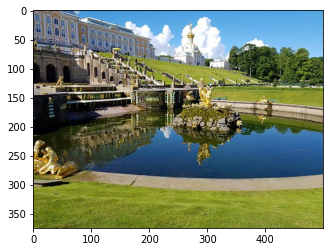

In [11]:
img_original = cv2.imread('garden.jpg')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.imshow(img_original)

In [12]:
print("высота:", img_original.shape[0], "ширина:", img_original.shape[1])
print("среднее значение интенсивности пикселя:", np.mean(img_original))

высота: 375 ширина: 500
среднее значение интенсивности пикселя: 107.41789511111111


Руками

In [18]:
def exposure(image, p):
    img_result = np.round(image.copy() * (2 ** p),0)
    img_result = img_result.astype(int)
    for i in range(img_result.shape[0]):
      for j in range(img_result.shape[1]): 
        for k in range(img_result.shape[2]):
          if img_result[i][j][k] > 255:
            img_result[i][j][k] = 255
    return img_result


img_result = exposure(img_original, 0.2)

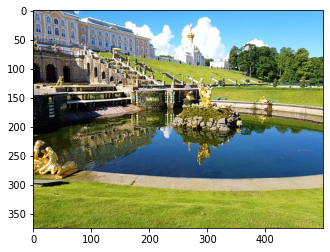

In [19]:
plt.imshow(img_result)

In [21]:
print("Среднее значение интенсивности пикселя исходного изображения:", np.mean(img_original))
print("Среднее значение интенсивности пикселя модифицированного изображения:", np.mean(img_result))

Среднее значение интенсивности пикселя исходного изображения: 107.41789511111111
Среднее значение интенсивности пикселя модифицированного изображения: 122.02473422222222


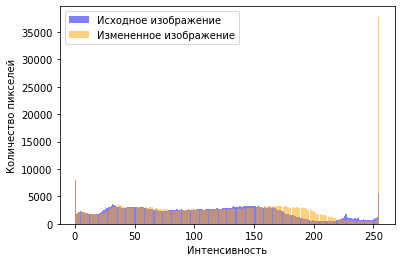

In [23]:
plt.hist(img_original.ravel(), bins = 256, color = 'Blue', alpha = 0.5)
plt.hist(img_result.ravel(), bins = 256, color = 'Orange', alpha = 0.5)
plt.legend(['Исходное изображение', 'Измененное изображение'])
plt.xlabel('Интенсивность')
plt.ylabel('Количество пикселей')
plt.show()

С библиотекой

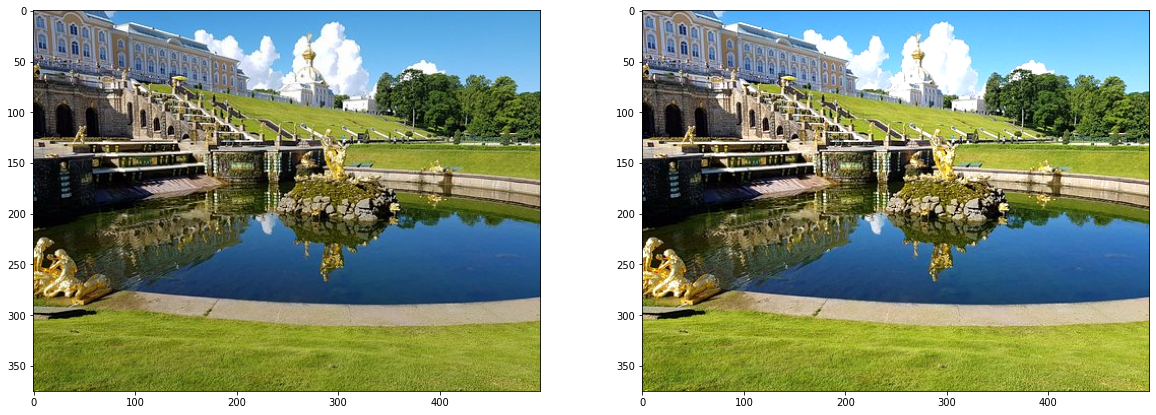

In [25]:
def exposure(image, p):
    return image.copy() * (2 ** p)

#Преобразование
img_result_lib = exposure(img_original, 0.2)
#Сохранение в файл
cv2.imwrite("img_result_lib.png", img_result_lib)
#Чтение из файла
img_result_lib = cv2.imread("img_result_lib.png")


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img_original)
axes[1].imshow(img_result_lib)